In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

mpl.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('../../data/clean/house_data.csv', usecols=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement'])
df.drop_duplicates(inplace=True)
df.dropna(axis=0, inplace=True)
df = df[df.bedrooms != 0]
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0


---
<h1>1. Central Tendency Measures (Mean, Median and Mode)</h1>
<img src="../../images/centraltendency.JPG" style="background:white; display: block; margin-left: auto;margin-right: auto; width:50%"/>
<ul style="font-size:13px">
    <li><strong>Mean</strong> — The average of all data points<ul>
            <li>Equals the sum of observations divided by the size of the sample
            <li>However, the mean doesn’t always locate the center of the data accurately especially when our data in a skewed distribution
            <li>Outliers have a substantial impact on the mean
            <li>ie. : if wages of 3 restaurant employees are $12, $14 and $15 per hour, then the average wage is $13.6 per hou
        </ul>
    <li><strong>Median</strong> — The data point where half of the data lies above and half below it<ul>
            <li>Also known as 50th percentile, the sample median is the middle number when the observations are written out in order
            <li>The median is more resistant to outliers and skewed data
            <li>When we have a skewed distribution, the median is a better measure of central tendency than the mean
            <li>ie. : if median income in a county is $100,000 per year, we could simply say that half the population has higher and the remaining half has lower than $100k income in the county
        </ul>
    <li><strong>Mode</strong> — The most common value in the data<ul>
            <li>Typically, we use the mode with categorical, ordinal, and discrete data
            <li>In fact, the mode is the only measure of central tendency that we can use with categorical data
            <li>ie. : Mode can help a grocery chain figure out which product is selling the most on different days of the week, month or year
        </ul>
</ul><br>
<p style="font-size:13px">
Which is the best?<ul>
    <li>When we have a symmetrical distribution for continuous data, the mean, median, and mode are equal
    <li>If we have a skewed distribution, the median is often the best measure of central tendency
    <li>When we have ordinal data, the median or mode is usually the best choice
    <li>For categorical data, we have to use the mode
</ul>
</p>

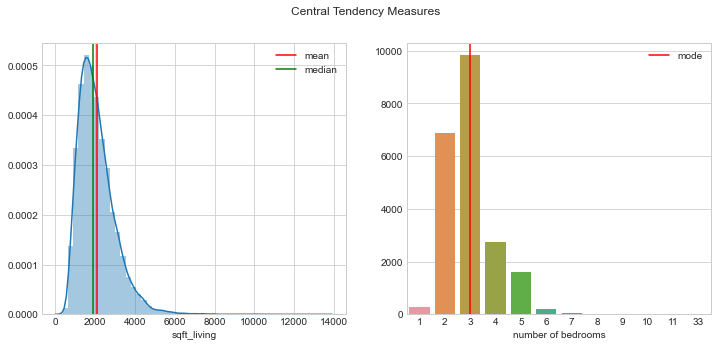

In [3]:
mpl.style.use('seaborn-whitegrid')

mean_val = df.sqft_living.describe(include='all')['mean']
med_val = df.sqft_living.describe(include='all')['50%']
mode_val = df.bedrooms.mode()[0]

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,5))

sns.distplot(df.sqft_living, kde=True, norm_hist=False, ax=ax[0])
ax[0].axvline(mean_val, color='red', label='mean')
ax[0].axvline(med_val, color='green', label='median')
ax[0].legend(loc='upper right')

sns.barplot(df.bedrooms.unique(), df.bedrooms.value_counts(), ax=ax[1])
ax[1].axvline(mode_val-1, color='red', label='mode')
ax[1].legend(loc='upper right')
ax[1].set_xlabel('number of bedrooms')
ax[1].set_ylabel('')

plt.suptitle('Central Tendency Measures')
plt.show()

---
<h1>2. Measures of Variability (Range, IQR, Variance and Standard Deviation)</h1>
<p style="font-size:13px">Let’s think, in certain cases, we are comparing two groups. we have already calculated the central tendency of our data i.e. Mean, Median and Mode for both the groups. Sometimes it may happen that mean, median, and mode are same for both groups. This indicates that, if we adequately describe a distribution some time it may need more information than the measures of central tendency so in this situation measures of variability comes into picture.<br>
<ul style="font-size:13px">
    <li><strong>Range</strong><ul>
            <li>The most simple measure of variability
            <li>It is the difference between the highest and the lowest value
            <li>As ranges takes only the count of extreme values sometimes it may not give us a good impact on variability
            <li>ie. : the range of 73, 79, 84, 87, 88, 91, and 94 is 21, because 94 – 73 is 21
        </ul><br>
    <li><strong>IQR</strong><ul>
            <li><img src="../../images/IQR.png" style="background:white; width:25%"/>
            <li>The IQR is a measure of variability, based on dividing a data set into quartiles or in short is the range of the middle 50% of the scores in a distribution
            <li>It is a better measure of dispersion than range because it leaves out the extreme values
            <li>IQR = Q3 (75th percentile) - Q1 (25th percentile)
            <li>It equally divides the distribution into four equal parts called quartiles<ul>
                    <li>Q1 is the 25% of the distribution data
                    <li>Q2 is the 50% of the distribution data and basically it is same as Median
                    <li>Q3 is the 75% of the distribution data
                </ul>
            <li>As a rule of thumb, observations can be qualified as outliers when they lie more than 1.5 IQR below the first quartile or 1.5 IQR above the third quartile<ul>
                    <li>Bottom outliers = Q1 – 1.5 * IQR
                    <li>Top outliers = Q3 + 1.5 * IQR
                </ul>
        </ul><br>
    <li><strong>Variance</strong><ul>
            <li><img src="../../images/variance.png" style="background:white; width:20%"/>
            <li>Using the mean as the measure of the middle of the distribution, Variance is defined as the average squared difference of the scores from the mean
            <li>The variance includes all values in the calculation by comparing each value to the mean by calculating a set of squared differences between the data points and the mean, sum them, and then divide by the number of observations -> it’s the average squared difference
            <li>Because the calculations use the squared differences, the variance is in squared units rather the original units of the data
            <li>While higher values of the variance indicate greater variability, there is no intuitive interpretation for specific values
        </ul><br>
    <li><strong>Standard Deviation</strong><ul>
            <li><img src="../../images/std.JPG" style="background:white; width:30%"/>
            <li>The standard deviation is simply the square root of the variance
            <li>When we have normally distributed data, or approximately so, the standard deviation becomes particularly valuable
            <li>A low standard deviation indicates that the data points tend to be very close to the mean while a high standard deviation indicates that the data points are spread out over a large range of values
            <li>The value of standard deviation can be easily impacted by outliers as a single outlier distorts the overall mean
            <li>Data with a higher standard deviation, however, will be more unpredictable
            <li>ie. : if we are told that the average starting salary for someone working at Company XYZ is $70,000, we may think, “Wow! That’s great.” But if the standard deviation for starting salaries at Company XYZ is $20,000, that’s a lot of variation in terms of how much money we can make, so the average starting salary of $70,000 isn’t as informative in the end but  if the standard deviation was only $5,000, we would have a much better idea of what to expect for a starting salary at that company
        </ul>
</ul>
</p>

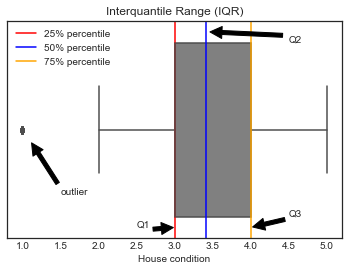



Measurement values for 'condition' feature:
mean 3.4098930109767958
variance 0.4233452296260313
standard deviation 0.6506498517836082


In [4]:
mpl.style.use('seaborn-white')

q1_val = df.condition.quantile([0.25,0.5,0.75])[0.25]
q3_val = df.condition.quantile([0.25,0.5,0.75])[0.75]
max_val = q3_val + 1.5 * (q3_val - q1_val)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,4))
sns.boxplot(df.condition, color='gray', ax=ax)
ax.annotate('outlier', xy=(1.1, 0.05), xytext=(1.5, 0.3), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Q1', xy=(q1_val, 0.45), xytext=(2.5, 0.45), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Q3', xy=(q3_val, 0.45), xytext=(4.5, 0.4), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('Q2', xy=(df.condition.mean(), -0.45), xytext=(4.5, -0.4), arrowprops=dict(facecolor='black', shrink=0.05))
ax.axvline(q1_val, color='red', label='25% percentile')
ax.axvline(df.condition.mean(), color='blue', label='50% percentile')
ax.axvline(q3_val, color='orange', label='75% percentile')
ax.set_xlabel('House condition')
ax.legend(loc='upper left')
ax.set_title('Interquantile Range (IQR)')
plt.show()

var_val = np.var(df.condition)
std_val = np.std(df.condition)
mean_val = df.condition.mean()
print(f"\n\nMeasurement values for 'condition' feature:\nmean {mean_val}\nvariance {var_val}\nstandard deviation {std_val}")

---
<h1>3. Skewness and Kurtosis</h1>
<img src="../../images/skew.jpeg" style="background:white; margin-left: 10%; width:44%"/>
<img src="../../images/kurto.jpeg" style="background:white; width:30%"/>
<p style="font-size:13px">In statistics, normality tests are used to determine whether a data set is modeled for normal distribution. Many statistical functions require that a distribution be normal or nearly normal.</p>
<ul style="font-size:13px">
    <li><strong>Skewness</strong><ul>
            <li>Skewness is usually described as a measure of a dataset’s symmetry or lack of symmetry in data distribution
            <li>Type of skewness:<ul>
                    <li><strong>Positive</strong> — means when the tail on the right side of the distribution is longer or fatter then the mean and median will be greater than the mode
                    <li><strong>Negative</strong> — is when the tail of the left side of the distribution is longer or fatter which means the mean and median will be less than the mode
                </ul>
            <li>A perfectly symmetrical data or normal distribution set will have a skewness of 0
            <li>The rule of thumb:<ul>
                        <li>If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
                        <li>If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed
                        <li>If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed
                </ul>
            <li>ie. : Suppose we have house values ranging from $100k to $1000k with the average being $500k, if the peak of the distribution was left of the average value, portraying a positive skewness in the distribution then it would mean that many houses were being sold for less than the average value which could be for many reasons
        </ul>
    <li><strong>Kurtosis</strong><ul>
            <li>Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution
            <li>Kurtosis is all about the tails of the distribution, not the peakedness or flatness
            <li>The kurtosis is 3 for a normal distribution
            <li>Type of kurtosis:<ul>
                    <li><strong>Mesokurtic</strong><ul>
                            <li>Kurtosis = 3
                            <li>This distribution has kurtosis statistic similar to that of the normal distribution
                            <li>It means that the extreme values of the distribution are similar to that of a normal distribution characteristic
                        </ul>
                    <li><strong>Leptokurtic</strong><ul>
                            <li>Kurtosis > 3
                            <li>Compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper
                            <li>Data are heavy-tailed or profusion of outliers
                        </ul>
                    <li><strong>Platykurtic</strong><ul>
                            <li>Kurtosis < 3
                            <li>Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader
                            <li>Data are light-tailed or lack of outliers
                        </ul>
                </ul>
            <li>Kurtosis level:<ul>
                    <li><strong>High kurtosis</strong><ul>
                            <li>Data has heavy tails or outliers
                            <li>Need to investigate why do we have so many outliers
                            <li>It indicates a lot of things, maybe wrong data entry or other things. Investigate!
                        </ul>
                    <li><strong>Low kurtosis</strong><ul>
                            <li>Data has light tails or lack of outliers
                            <li>Too good to be true
                            <li>Need to investigate and trim the dataset of unwanted results
                        </ul>
                </ul>
        </ul>
</ul><br>
<p style="font-size:13px"><strong>Important note: In short, skewness and kurtosis are practically worthless. Shewhart made this observation in his first book. The statistics for skewness and kurtosis simply do not provide any useful information beyond that already given by the measures of location and dispersion. So, don't put much emphasis on skewness and kurtosis values we may see. And remember, the more data we have, the better we can describe the shape of the distribution.</strong></p>

In [5]:
from scipy.stats import kurtosis, skew

# Using python built-in function
df_skew_builtin = pd.DataFrame(df.skew(), columns=['skew-builtin'])
df_kurto_builtin = pd.DataFrame(df.kurtosis(), columns=['kurtosis-builtin'])

# Using scipy
df_skew_scipy = pd.DataFrame(skew(df), columns=['skew-scipy']).set_index([pd.Index(df.skew().index.values.tolist())])
df_kurto_scipy =pd.DataFrame(kurtosis(df), columns=['kurtosis-scipy']).set_index([pd.Index(df.kurtosis().index.values.tolist())])

# display values
display(df_skew_builtin.join([df_skew_scipy,df_kurto_builtin,df_kurto_scipy]))

,skew-builtin,skew-scipy,kurtosis-builtin,kurtosis-scipy
price,4.024978,4.024699,34.591216,34.582928
bedrooms,2.019972,2.019831,49.751384,49.739586
bathrooms,0.517402,0.517366,1.279112,1.278538
sqft_living,1.472441,1.472339,5.247543,5.246050
sqft_lot,13.070532,13.069624,285.413653,285.347284
floors,0.614891,0.614848,-0.491190,-0.491354
condition,1.035054,1.034982,0.518175,0.517777
grade,0.782639,0.782585,1.148742,1.148198
sqft_above,1.447170,1.447070,3.403488,3.402422
sqft_basement,1.576795,1.576686,2.710808,2.709902


---
<h1>4. Normality Test (<a href="https://en.wikipedia.org/wiki/Normality_test">source</a>)</h1>
<ul style="font-size:13px">
    <li><strong>Anderson-Darling</strong><ul>
            <li><img src="../../images/normalitytest.JPG" style="background:white; width:20%"/>
            <li>The Anderson-Darling tests if data comes from a particular distribution
            <li>This is a more sensitive test to check different distributions
            <li>If the returned statistic is larger than critical values then for the corresponding significance level, the null hypothesis (h0) that the data come from the chosen distribution can be rejected
        </ul>
    <li><strong>Lilliefors</strong><ul>
            <li>The Lilliefors test is strongly based on the Kolmogorov-Smirnov test
            <li>The difference is that in the Lilliefors test, it is accepted that the mean and variance of the population distribution are estimated rather than pre-specified by the user
            <li>P-Value<ul>
                    <li> > 0.05 : h0 is accepted — normal distribution
                    <li> < 0.05 : h0 is rejected
                </ul>
        </ul>
    <li><strong>Kolmogorov-Smirnov</strong><ul>
            <li>The Kolmogorov–Smirnov tests if a sample distribution fits a cumulative distribution function (CDF) of are referenced distribution
            <li>P-Value<ul>
                    <li> > 0.05 : h0 is accepted — normal distribution
                    <li> < 0.05 : h0 is rejected
                </ul>
        </ul>
    <li><strong>Shapiro-Wilk (this test has the best power for a given significance)</strong><ul>
            <li>The Shapiro Wilk test is the most powerful test when testing for a normal distribution
            <li>This test is not suitable for data that has size more than 5000
            <li>P-Value<ul>
                    <li> > 0.05 : h0 is accepted — normal distribution
                    <li> < 0.05 : h0 is rejected
                </ul>
        </ul>
</ul>

In [6]:
from scipy.stats import anderson, kstest, norm, shapiro
from statsmodels.stats.diagnostic import lilliefors

# Anderson-Darling test
pval_anderson = anderson(df.sqft_living, dist='norm').statistic
min_anderson = anderson(df.sqft_living, dist='norm').critical_values
stat_anderson = np.array([True for i in min_anderson if pval_anderson < i]).sum() > 1
andr = [pval_anderson, min_anderson, stat_anderson]

# Lilliefors test
_, pval_lilliefors = lilliefors(df.sqft_living[:100], dist='norm')
min_lilliefors = 0.05
stat_lilliefors = pval_lilliefors > min_lilliefors
lillie = [pval_lilliefors, min_lilliefors, stat_lilliefors]

# Kolmogorov-Smirnov test
_, pval_ks = kstest(df.sqft_living[:100], 'norm')
min_ks = 0.05
stat_ks = pval_ks > min_ks
ks = [pval_ks, min_ks, stat_ks]

# Shapiro-Wilk test
_, pval_shapiro = shapiro(df.sqft_living[:100])
min_shapiro = 0.05
stat_shapiro = pval_shapiro > min_shapiro
shpr = [pval_shapiro, min_shapiro, stat_shapiro]

# Visualize
display(pd.DataFrame([andr, lillie, ks, shpr],
        columns=['p-value', 'alpha', 'is h0 accepted?']
        ).set_index([pd.Index(['anderson', 'lilliefors', 'kolmogorov-smirnov', 'shapiro'])]))

,p-value,alpha,is h0 accepted?
anderson,326.912275,"[0.576, 0.656, 0.787, 0.918, 1.092]",False
lilliefors,0.043317,0.05,False
kolmogorov-smirnov,0.000000,0.05,False
shapiro,0.000036,0.05,False


---
<h1>5. Critical Value and P-Value Parameters</h1>
<img src="../../images/crit_pval.JPG" style="background:white; display: block; margin-left: auto;margin-right: auto; width:60%"/>
<img src="../../images/h0h1.png" style="background:white; display: block; margin-left: auto;margin-right: auto; width:60%"/>
<ul style="font-size:13px">
    <li>Definition<ul>
            <li><strong>P-Value (Probability value)</strong> — the probability of obtaining test results at least as extreme as the results actually observed during the test, assuming that the null hypothesis is correct
            <li><strong>Critical value</strong> — the boundaries of the acceptance region of the test
        </ul>
    <li>Details<ul>
            <li>The p-value is the variable that allows us to reject the null hypothesis (H₀: µ₁=µ₂)
            <li>However, since the p-value is just a value, we need to compare it with the critical value (⍺)
        </ul>
    <li>Conditions<ul>
                <li><strong>p_value > ⍺ (Critical value)</strong>: Fail to reject the null hypothesis of the statistical test
                <li><strong>p_value ≤ ⍺ (Critical value)</strong>: Reject the null hypothesis of the statistical test
            </ul>
    <li>The rule of thumb<ul>
                <li>The critical value that most statisticians choose is ⍺ = 0.05
                <li>Also, in some cases, statisticians choose ⍺ = 0.01
                <li>Reducing the critical value from 0.05 to 0.01 decreases the chance of a false positive (called a Type I error), but it also makes it more difficult to reject the null hypothesis
                <li>Therefore, with a critical value of 0.01, the results are more trustworthy but also more difficult to obtain
                <li><strong>p_value > 0.1</strong>: No evidence
                <li><strong>p_value between 0.05 and 0.1</strong>: Weak evidence
                <li><strong>p_value between 0.01 and 0.05</strong>: Evidence
                <li><strong>p_value between 0.001 and 0.01</strong>: Strong evidence
                <li><strong>p_value < 0.001</strong>: Very strong evidence
            </ul>
    <li>Test types<ul>
            <li><strong>One-tailed</strong><ul>
                    <li>The one-tailed test is appropriate when there is a difference between groups in a specific direction
                    <li>H0: µ₁=µ₂
                    <li>H1: µ₁>µ₂
                </ul>
            <li><strong>Two-tailed</strong><ul>
                    <li>H0: µ₁=µ₂
                    <li>H1: µ₁!=µ₂
                </ul>
        </ul>
</ul>

---
<h1>6. Statistical Test</h1>
<ul style="font-size:13px">
    <li><strong>Z-Test</strong><ul>
            <li><img src="../../images/z-alpha.png" style="background:white; width:25%"/>
            <li>Z-Test is a statistical test to determine whether two population means are different when the variances are known and the sample size is large
            <li>In a Z-Test, the sample is assumed to be normally distributed
            <li>Hypothesis testing<ul>
                    <li><strong>Null hypothesis (h0)</strong> — Sample mean is same as the population mean
                    <li><strong>Alternative hypothesis (h1)</strong> — Sample mean is not same as the population mean
                </ul>
            <li>The formula<ul>
                    <li>z = (x — μ) / (σ / √n)
                    <li>x = sample mean
                    <li>μ = population mean
                    <li>σ / √n = population standard deviation
                </ul>
            <li>In common use, statistician use 5% of Significance Level (⍺) to compare with Z-score
            <li>If the test statistic or Z-score is lower than the critical value (z alpha/2), accept the hypothesis or else reject the hypothesis
        </ul>
    <li><strong>T-Test</strong><ul>
            <li>T-test is a inferential statistic which is used to determine difference or to compare the means of two groups or samples which may be related in certain features and it is performed on continuous variables
            <li>ie. : Compare if the people of one country are taller than people of another one or compare if the brain of a person is more activated while watching happy movies than sad movies
            <li>Like a Z-Test, a T-Test also assumes a normal distribution of the sample
            <li>A T-Test is used when the population parameters (mean and standard deviation) are not known while the data should follow a continuous or ordinal scale and the observations in the data should be randomly selected
            <li>Versions of T-Test<ul>
                    <li><strong>One sample T-Test</strong> — it tells whether means of sample and population are different
                    <li><strong>Independent samples T-Test</strong> — it compares the means of two independent groups and determine weather there is statistical evidence that the associated population means are significantly different
                    <li><strong>Paired sample T-Test (Two-sample T-Test)</strong> — it compares means from the same group at different times
                </ul>
            <li>The formula<ul>
                    <li>t = (x1 — x2) / (σ / √n1 + σ / √n2)
                    <li>x1 = mean of sample 1
                    <li>x2 = mean of sample 2
                    <li>n1 = size of sample 1
                    <li>n2 = size of sample 2
                </ul>
            <li>Acceptance value<ul>
                    <li><a href="https://www.gradecalculator.tech/t-table/">T-tables</a> parameters<ul>
                            <li><strong>The cumulative probability (cum.prob)</strong> — the value of a random variable falls within a specified range
                            <li><strong>n-tail(s) alpha</strong> — depending on the statistical analysis that we are running
                            <li><strong>The number of degrees of freedom (df/p)</strong> — refers to the maximum number of logically independent values in the data sample
                        </ul>
                    <li>Once we have the t-value, we have to look at the t-tables
                    <li>If the absolute value of our t-value is higher than the value in the tables, we can reject the null hypothesis
                </ul>
        </ul>
    <li><strong>ANOVA</strong><ul>
            <li>It is also called as Analysis of Variance and is used to compare multiple (three or more) samples with a single test
            <li>Major flavors<ul>
                    <li><strong>One-way ANOVA</strong> — It is used to compare the difference between the three or more samples/groups of a single independent variable
                    <li><strong>MANOVA</strong> — It allows us to test the effect of one or more independent variable on two or more dependent variables and it can also detect the difference in co-relation between dependent variables given the groups of independent variables
                </ul>
            <li>Hypothesis testing<ul>
                    <li><strong>Null hypothesis (h0)</strong> — All pairs of samples are same or in short  there’s no significant difference i.e. all sample means are equal
                    <li><strong>Alternative hypothesis (h1)</strong> — At least one pair of samples is significantly different
                </ul>
            <li>The statistics used to measure the significance is called F-statistics
            <li>The formula<ul>
                    <li>F = ((SSE1 — SSE2)/m) / (SSE2/(n-k))
                    <li>SSE = residual sum of squares
                    <li>m = number of restrictions
                    <li>k = number of independent variables
                </ul>
            <li>Calculate F-statistic : if calculated F value > F table value (critical value), reject Ho<ul>
                    <li><img src="../../images/anova-table.png" style="background:white; margin-left: 0px; width:35%"/>
                    <li><a href="https://www.statsmodels.org/devel/example_formulas.html">OLS R-style formulas</a>
                    <li><a href="https://www.socscistatistics.com/tests/criticalvalues/default.aspx">Find critical value for F</a>
                    <li><strong>Degrees of Freedom (Numerator)</strong> — Total features being observed minus 1
                    <li><strong>Degrees of Freedom (Denominator)</strong> — Σ SUM(feature_ith)-1
                </ul>
        </ul>
    <li><strong>Chi-Square Test</strong><ul>
            <li>Chi-Square test is used when we perform hypothesis testing on two categorical variables from a single population or we can say that to compare categorical variables from single population or in short <strong>Chi-square test is used to compare categorical variables</strong>
            <li>When we want to find out dependency between the variables using Chi-Square tests, all the parameters should be categorical
            <li>Types of Chi-Square test<ul>
                    <li><strong>goodness of fit test</strong> — it determines if a sample matches the population
                    <li><strong>for two independent variables</strong> — it is used to compare two variables in a contingency table to check if the data fits<ul>
                            <li>A small chi-square value means that data fits or in other words, there is a relationship
                            <li>A high chi-square value means that data doesn’t fit or in other words, there isn’t a relationship
                        </ul>
                </ul>
            <li>Hypothesis testing<ul>
                    <li><strong>Null hypothesis (h0)</strong> — Variable A and Variable B are independent
                    <li><strong>Alternative hypothesis (h1)</strong> — Variable A and Variable B are not independent
                </ul>
            <li>Because of how the Chi-Square value is calculated, it is extremely sensitive to sample size so when the sample size is too large (~500), almost any small difference will appear statistically significant
            <li>The statistic used to measure significance is called chi-square statistic
            <li>The formula<ul>
                    <li>Χ2 = Σ [ (Or,c — Er,c)^2 / Er,c ]
                    <li>Or,c = observed frequency count at level r of Variable A and level c of Variable B
                    <li>Er,c = expected frequency count at level r of Variable A and level c of Variable B
                </ul>
            <li>The usual alpha level is 0.05 (5%), but we could also have other levels like 0.01 (this confident level is 99.99%) or 0.10
            <li>If the chi-square value is more than the critical value, then there is a significant difference or we can say h0 is rejected<ul>
                    <li><a href="https://people.richland.edu/james/lecture/m170/tbl-chi.html">Chi-Square probabilities table</a>
                    <li><strong>Degree of freedom (Df)</strong> : (varA_samplesize - 1) * (varB_samplesize - 1)<ul>
                            <li>ie. : VarA is Gender (Male & Female) and VarB is score (Low, Medium, High, Excellent)
                            <li> so the Df value is Df = (2-1)*(4-1) = 3
                        </ul>
                </ul>
            <li>ie. : <a href="https://medium.com/wenyi-yan/a-simple-explanation-to-understand-chi-square-test-1814fa261499">Example cases</a>
        </ul>
</ul>

In [7]:
from statsmodels.stats import weightstats

# One-sample Z-Test
ztest, pval = weightstats.ztest(x1=df['bedrooms'], x2=None, alternative="two-sided", value=df['bedrooms'].mean())

if pval < 0.05:
    print(f"reject null hypothesis for One-sample Z-test")
else:
    print("accept null hypothesis for One-sample Z-test")

# Two-samples Z-Test
one_floor = df[df['floors'] == 1.0]
two_floors = df[df['floors'] == 2.0]
ztest, pval = weightstats.ztest(x1=one_floor['sqft_living'],
                                x2=two_floors['sqft_living'],
                                alternative="two-sided",
                                value=abs(one_floor['sqft_living'].mean()-two_floors['sqft_living'].mean())
                )

if pval < 0.05:
    print(f"reject null hypothesis for Two-samples Z-test")
else:
    print("accept null hypothesis for Two-samples Z-test")

accept null hypothesis for One-sample Z-test
reject null hypothesis for Two-samples Z-test


In [8]:
# One sample T-Test
from scipy.stats import ttest_1samp

'''
h0 : avg sqft_living is 2000 from 500 observations
h1 : avg sqft_living isn't 2000 from 500 observations
'''
ttest_all, pval_all = ttest_1samp(a=df['sqft_living'], popmean=2079)
ttest_500, pval_500 = ttest_1samp(a=df['sqft_living'].values[:500], popmean=2000)
pval = pval_500*2 # Because pval_500 is two-tailed p-value

if pval < 0.05:
    print(f"reject null hypothesis for One sample T-Test")
else:
    print("accept null hypothesis for One sample T-Test")

print("the greater the number of observations, the smaller the difference between the popmean value and the mean value of the entire population so that h0 can be accepted\n\n")

# Independent samples T-Test
from scipy.stats import ttest_ind

'''
h0 : there is an association between 'condition' and 'grade' features
h1 : there isn't an association between 'condition' and 'grade' features
'''
ttest_500, pval_500 = ttest_ind(a=df['condition'].values[:500], b=df['grade'].values[:500], axis=0)
pval = pval_500*2 # Because pval_500 is two-tailed p-value

if pval < 0.05:
    print(f"reject null hypothesis for Independent samples T-Test\n\n")
else:
    print("accept null hypothesis for Independent samples T-Test\n\n")

# Paired sample T-Test
from scipy.stats import ttest_rel

'''
h0 : means of price difference between sample with 1 floor and sample with 2 floors is 0
h1 : means of price difference between sample with 1 floor and sample with 2 floors isn't 0
'''
one_floor = df[df['floors'] == 1.0]['price'].values[:500]
two_floors = df[df['floors'] == 2.0]['price'].values[:500]
ttest_500, pval_500 = ttest_rel(a=one_floor, b=two_floors, axis=0)
pval = pval_500*2 # Because pval_500 is two-tailed p-value

if pval < 0.05:
    print(f"reject null hypothesis for Paired sample T-Test")
else:
    print("accept null hypothesis for Paired sample T-Test")

reject null hypothesis for One sample T-Test
the greater the number of observations, the smaller the difference between the popmean value and the mean value of the entire population so that h0 can be accepted


reject null hypothesis for Independent samples T-Test


reject null hypothesis for Paired sample T-Test


In [9]:
# One-way ANOVA
from scipy.stats import f_oneway
'''
h0 : 5 categories of condition are similar based on price
h1 : 5 categories of condition aren't similar based on price
'''
df_owa = df[['price','condition']]
cat = pd.unique(df_owa.condition.values)
owa_obs = {c:df_owa['price'][df_owa.condition == c] for c in cat}
ftest, pval = f_oneway(owa_obs[1], owa_obs[2], owa_obs[3], owa_obs[4], owa_obs[5])

if pval < 0.05:
    print("reject null hypothesis for One-way ANOVA\n\n")
else:
    print("accept null hypothesis One-way ANOVA\n\n")

# Two-way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

'''
h0 : there is no significant difference
h1 : there isan overall significant effect of independent variables
'''
mod = ols('price ~ C(bedrooms) + sqft_living + C(condition) + C(grade)', data=df[['price','bedrooms', 'sqft_living','condition', 'grade']]).fit()
table = sm.stats.anova_lm(mod, typ=2)
print(mod.summary(), end='\n\n')
print(table)

reject null hypothesis for One-way ANOVA


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     1258.
Date:                Wed, 09 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:57:17   Log-Likelihood:            -2.9733e+05
No. Observations:               21591   AIC:                         5.947e+05
Df Residuals:                   21564   BIC:                         5.949e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [10]:
#  Chi-Square Test
from scipy.stats import chi2_contingency, chi2

contingency_table = pd.crosstab(df.bedrooms, df.bathrooms)
chi_cont = chi2_contingency(contingency_table) # The returned data of chi_cont includes: chi_squared_stat, p_value, df(ddof), expected_crosstab
observed_vals = contingency_table.values
expected_vals = chi_cont[3]

rows = len(contingency_table.iloc[:, 0])
cols = len(contingency_table.iloc[0,:])
ddof = (rows-1)*(cols-1)
alpha = 0.05

chi_square = sum([(o-e)**2/e for o, e in zip(observed_vals, expected_vals)])
chi_square_statistic = chi_square[0] + chi_square[1]

critical_val = chi2.ppf(q=1-alpha, df=ddof)
pval = 1 - chi2.cdf(x=chi_square_statistic, df=ddof)

if chi_square_statistic >= critical_val or pval <= alpha:
    print("Reject h0,There is a relationship between 'condition' and 'bedrooms'")
else:
    print("Accept h0,There is no relationship between 'condition' and 'bedrooms'")

Accept h0,There is no relationship between 'condition' and 'bedrooms'


---
<h1>7. Correlation</h1>

---
<h1>8. PDF, PMF and CDF</h1>